# Please, stay `for` a `while`

## Overview:
- Teaching: _time_
- Exercises: _time_

Objectives:
- Introduce `for` and `while` loops
- Understand the difference between their interpretation
- Employ both types of loops for automating MATLAB tasks

## Setup:

For this lesson we are going to be using the pringle function that we defined in the previous lesson, so make sure that it's file is in your current working directory.

In [1]:
function [z] = f(x,y,a,b)

z = (x.*x)./(a*a) + (y.*y)/(b*b);

end %function

:+Setup

## It takes `for`-ever

In the previous lesson we looked at plotting functions and function handles, and towards the end we started adding multiple plots to the same figure.
To do this, we had to turn `hold` on and then type out all the plotting commands that we wanted to execute.
This was fine for us, because we were only plotting 3 different sets of data, but what if you wanted to plot 10 different sets of data?
What about 20?
50? 100? (It happens, trust me.)

Unless you fancy typing out about 100 lines of plot statements, _plus_ another 100-odd lines to actually generate the data that you need to give the plotting commands, you're going to want a alternative method for this.
This is where `for` loops come in.

Placing a segment of code in a `for` loop (or "`for` block") allows it to be executed multiple times using different variable values - ideal for when you have a a process that you want to carry out repeatedly.
Let's look at a minimum informative example:

In [2]:
for i = 1:10
    disp(i)
end %for

 1
 2
 3
 4
 5
 6
 7
 8
 9
 10


To tell MATLAB we are starting a `for` loop, we of course need to type the keyword `for`.
After this keyword, we need to tell MATLAB the values we want to loop over, and give it a "loop" variable - this is what the `i = 1:10` part means.
`i` is the name that we are giving to our loop variable.
`1:10` are the values that we want to loop over; in this case we want `i` to take each integer value between 1 and 10 inclusive.
Remember that when slicing arrays, typing `1:10` would mean "take all the values at indices 1 through 10" - it's a similar meaning here.

After the first line, the actual "loop" begins - MATLAB should auto-indent your code to make it clearer for you where the loop begins, but you don't need to do this.
Here we can type commands and use the loop variable `i`; in this case our loop consists of only one command - `disp(i)`.
To tell MATLAB that the loop is over, we use the `end` keyword - yes this is the same keyword as you used to end functions, and will be using to end `while` and `if` statements too!
As such it's good practice to put a short comment after your `end` statements to remind you what they are ending!

When we run the code, you'll notice that each of the values from 1 to 10 are printed to the screen, that is the `disp(i)` command has been executed for each value of `i` in the range `1:10`, as we asked.
With this idea in mind, let's look at a slightly more illustrative example:

In [3]:
xRange = linspace(0,1,10);

for i = 1:5
    vals = f(xRange, 0, i, 1);
    disp(vals)
end %for, i

 Columns 1 through 8:

   0.00000   0.01235   0.04938   0.11111   0.19753   0.30864   0.44444   0.60494

 Columns 9 and 10:

   0.79012   1.00000
 Columns 1 through 8:

   0.00000   0.00309   0.01235   0.02778   0.04938   0.07716   0.11111   0.15123

 Columns 9 and 10:

   0.19753   0.25000
 Columns 1 through 8:

   0.00000   0.00137   0.00549   0.01235   0.02195   0.03429   0.04938   0.06722

 Columns 9 and 10:

   0.08779   0.11111
 Columns 1 through 7:

   0.000000   0.000772   0.003086   0.006944   0.012346   0.019290   0.027778

 Columns 8 through 10:

   0.037809   0.049383   0.062500
 Columns 1 through 7:

   0.000000   0.000494   0.001975   0.004444   0.007901   0.012346   0.017778

 Columns 8 through 10:

   0.024198   0.031605   0.040000


This `for` loop has evaluated the function `f` (our pringle) over the range `xRange`, with `y=0,b=1` and `a` ranging from `1:5`, and has printed the results to the screen.
Note that we can use variables we define _outside_ a `for` loop in the instructions inside the loop, which is handy if there is a variable we use in our process that _doesn't_ change!

Now, consider what happens if we do the following:

In [4]:
xRange = linspace(0,1,250);
varStore = zeros(5,250);
aValues = [0.25 0.5 0.75 1.0 1.25];

for i = 1:5
    vals = f(xRange, 0, aValues(i), 1);
    varStore(i,:) = vals;
end %for, i

## Exercise: Expectations

What do you expect to be stored in `varStore`?

## Solution: Expectations

The rows of `varStore` correspond to the evaluation of `f` at all the points in `xRange`, where row `i` has had `f` evaluated with `a` set to `aValues[i]`.
That is, row 1 of `varStore` is the evaulation of `f` at all points in `xRange`, with `a=0.25`.
Row 2 is the evaulation of `f` at all points in `xRange`, with `a=0.5`, and so forth up to `i=5` and `a=1.25`.

Notice that we have preallocated the array `varStore` to prevent issues with growing arrays.
Also, we could have directly allocated the `i`-th row of `varStore`, cutting out the need for `vals` by using:

```octave
xRange = linspace(0,1,250);
varStore = zeros(5,250);
aValues = [0.25 0.5 0.75 1.0 1.25];

for i = 1:5
    varStore(i,:) = f(xRange, 0, aValues(i), 1);
end %for, i
```

This avoids having to define another array `vals` whose values are only temporary (we overwrite them on each loop, and only use it to hold the values each time) which speeds up the process even further.

Now we can return to our original question of plotting multiple functions on the same graph: the plan will be to use a `for`-loop to generate each set of `f`-data, and then add it to a plot.

## Exercise: Do it `for` me

Complete the following script by filling in the commands in the indicated places.
This script is designed to fulfil the purpose we worked towards above: generate `f`-data for several values of the parameter `a` (with `y=0`) and add these to the same plot.
The comments will provide you with hints.

```octave
clear;
close all;

xRange = linspace(0,1,250);
aValues = 0.5:0.1:1.5; %remember: this generates an array of the values from 0.5 to 1.5, going up in steps of 0.1

%create a new figure with ID 1
fig = figure(1);
%ensure that all plotting is done on this figure, without overwriting

<CODE MISSING>

for i=1:length(aValues)
    %compute the values for f at the i-th value of a, and graph the data you get onto the current figure.
    %don't worry about trying to specify line colours, MATLAB will do it for you
    
    <CODE MISSING>
end %for, i

%set axis labels for your figure
<CODE MISSING>

%ensure that we don't overlay plots anymore
<CODE MISSING>
```

## Solution+: Do it `for` me

The missing code should be filled in as follows, and produce the following output:

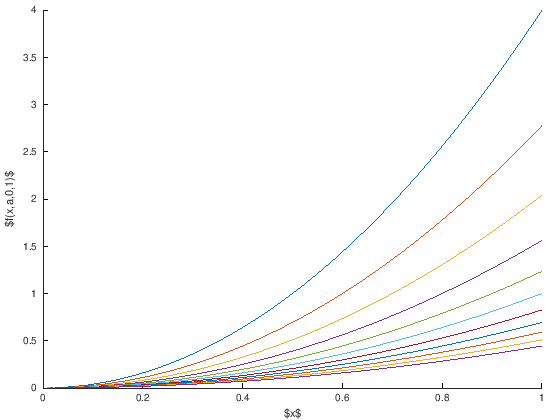

In [5]:
clear;
close all;

xRange = linspace(0,1,250);
aValues = 0.5:0.1:1.5; %remember: this generates an array of the values from 0.5 to 1.5, going up in steps of 0.1

%create a new figure with ID 1
fig = figure(1);
%ensure that all plotting is done on this figure, without overwriting
hold on;

for i=1:length(aValues)
    %compute the values for f at the i-th value of a, and graph the data you get onto the current figure.
    %don't worry about trying to specify line colours, MATLAB will do it for you
    plot(xRange, f(xRange, 0, aValues(i), 1));
end %for, i

%set axis labels for your figure
xlabel('$x$','interpreter','latex');
ylabel('$f(x,a,0,1)$','interpreter','latex');

%ensure that we don't overlay plots anymore
hold off;

Notice how MATLAB is clever enough to change the colour of your lines automatically when you plot to the same figure!

:Solution+

## `while` you're at it

`for`-loops provide us with a method of executing similar tasks over and over, whilst changing the variable values or parameters that are being put into the commands themselves.
This is useful when we have a set number of cases to run through, but a `for`-loop will (eventually) terminate. 
It always has a finite number of cases to run through, and so isn't particularly useful if you want to run some commands until you reach a certain criteria.

For example; you might want to run a numerical method for computing digits of $\pi$ to a certain number of decimal places, or find the roots of a function to a certain tolerance.
The methods here are iterative - they involve "building on" sucessive approximations to a given value of interest.
Using a `for`-loop does not guarantee that we will reach the desired level of accuracy - we might not tell our `for`-loop to perform enough iterations, or we might go the other way and make it perform _too many_ iterations!

In these cases, it is better to use a `while` loop or block.
Code that is placed inside a `while` loop will continue to run until a certain condition, provided by the user, is met.
Essentially, a `while` loops acts like a `for`-loop but doesn't run it's code a fixed number of times.
The general syntax for a `while`-loop is:
```octave
while <CONDITION>

    <PERFORM INSTRUCTIONS>

end %while; yes, this is the same end keyword again...
```

However an example is more useful:

In [6]:
x = 0;

while x<10
    x = 2*x+1;
    fprintf('x is now: %d \n', x)
end %while, x<10

fprintf('The value of x at the end of the loop is: %d', x)

x is now: 1 
x is now: 3 
x is now: 7 
x is now: 15 
The value of x at the end of the loop is: 15

In this example, we have a variable `x` that begins at the value 0.

The condition on the `while` loop is `x<10` - this means that all the time `x<10`, the loop below will keep running.
Within the loop itself, the first instruction is to double `x` and add 1, then to print the new value of `x` to the screen.
We can see the result of the loop: `x` is set to 1, then 3, 7, and 15.
Upon reaching `x=15`, the condition `x<10` no longer holds, and so MATLAB moves on from the while loop.
Notice that the value of `x` can still be used outside the `while` loop, too.

## Information+: When is the condition checked?

MATLAB will only check the condition you give a `while`-loop _at the end_ of your commands in the loop itself. 
That is, MATLAB will check your condition the first time it reaches the `while` loop, and will only check it again after all the commands in the loop have been run!
Consider the following example:

In [7]:
x = 0;

while x<10
    x = 2*x;
    fprintf('x is now: %d \n', x)
    x = x+1;
    fprintf('x is now: %d \n', x)
end %while, x<10

fprintf('Value of x finished at: %d', x)

x is now: 0 
x is now: 1 
x is now: 2 
x is now: 3 
x is now: 6 
x is now: 7 
x is now: 14 
x is now: 15 
Value of x finished at: 15

Notice how the value of `x` is set to 14, but the `while` loop does not stop there and still performs the next computation (`x=x+1`) anyway.
This is because all the commands in the `while`-loop itself are run before the condition is checked again.
We can illustrate this with another `fprintf` statement:

In [8]:
x = 0;

while x<10
    fprintf('I checked the value of x and it was still <10 \n')
    x = 2*x;
    fprintf('x is now: %d \n', x)
    x = x+1;
    fprintf('x is now: %d \n', x)
    fprintf('I''ve done everything in the while loop, time to check the condition again. \n')
end %while, x<10

fprintf('Value of x finished at: %d', x)

I checked the value of x and it was still <10 
x is now: 0 
x is now: 1 
I've done everything in the while loop, time to check the condition again. 
I checked the value of x and it was still <10 
x is now: 2 
x is now: 3 
I've done everything in the while loop, time to check the condition again. 
I checked the value of x and it was still <10 
x is now: 6 
x is now: 7 
I've done everything in the while loop, time to check the condition again. 
I checked the value of x and it was still <10 
x is now: 14 
x is now: 15 
I've done everything in the while loop, time to check the condition again. 
Value of x finished at: 15

:Information+

## Exercise+: Time for some $\pi$

The Gregory-Leibniz formula for $\pi$ is
$$ \pi = 4 \sum_{k=1}^{\infty}\frac{(-1)^{k+1}}{2k-1} \approx 4\left( 1 - \frac{1}{3} + \frac{1}{5} - ... \right).$$
Obviously a computer is incapable of performing the exact summation (because infinite terms and all) and so most programming languages include a built-in variable for a (very precise) decimal approximation to $\pi$ - in MATLAB this value can be accessed via the variable `pi`:

In [9]:
fprintf('%.10f \n',pi)

3.1415926536 


In this exercise, you will test how fast the Gregory-Leibniz formula is at computing `pi` to different levels of accuracy.
Consider the following code:

```octave
pi_approx = 0;
k = 1;
err = abs(pi - pi_approx); %the abs function in MATLAB returns the absolute value
tol = 1e-1; %tol is short for tolerance; this quantifies the accuracy to which we want our value

while <CONDITION>
    <COMMANDS>
end %while, <CONDITION>

fprintf('Terms needed to compute pi to tolerance of %.1e was: %d \n', tol, k-1)
fprintf('The error in the final approximation was %.2e \n', err)
```

The variable `pi_approx` stores our current approximation of $\pi$, by evaulating terms in the Gregory-Leibniz series.
The value in `k` is the index of the _next_ term in the series, that we have not yet added on.
`err` stores the current error (difference) between our approximation and the value MATLAB has stored in `pi`.
`tol` is the tolerance for our approximation - we will deem our approximation good enough if the error is less than this value.

Your job is to fill in the missing `while`-loop; the steps you'll need to impliment are below:
- The while loop should keep running until our approximation for $\pi$ is deemed to be good enough, given the value of the tolerance.
- If our approximate value is not good enough; we will need to add the next term in the Gregory-Leibniz series onto our current value of `pi_approx`, then update the error variable to account for our new approximation, and add 1 to `k` (so that we move onto the next term in the series).

Once you have filled in the `while` loop, run the code.
1. How many terms are needed?
1. If you adjust the tolerance (change the order between -1 and -8) how does the number of terms needed change?
1. (Optional) Can you write a script that determines the number of terms needed for each of the tolerances `1e-1,1e-2,1e-3,1e-4,1e-5`? (Hint: you can put `while`-loops _inside_ `for`-loops...)

:Exercise+

## Solution+: Time for some $\pi$

The `while` loop needs to be fixed as follows:

In [10]:
pi_approx = 0;
k = 1;
err = abs(pi - pi_approx); %the abs function in MATLAB returns the absolute value
tol = 1e-1; %tol is short for tolerance; this quantifies the accuracy to which we want our value

while err>tol
    pi_approx = pi_approx + 4 * (-1)^(k+1)/(2*k-1); %add on the next term in the series
    err = abs(pi - pi_approx); %update the error with our new pi_approx value
    k = k+1; %move onto the next term in the sequence in preparation for next time
end %while, err>tol

fprintf('Terms needed to compute pi to tolerance of %.1e was: %d \n', tol, k-1)
%note: there's a k-1 here because we add 1 to k at the end of the loop, anticipating that we will need the next term
%as such, if we only need 1 term, we will still update k from 1 to 2, even though we don't use the second term
%hence, there's a -1 in here!
fprintf('The error in the final approximation was %.2e \n', err)

Terms needed to compute pi to tolerance of 1.0e-01 was: 10 
The error in the final approximation was 9.98e-02 


As you vary `tol`, you should notice a marked increase in the number of iterations required for the series to get close to the value of `pi`.
Indeed, we can automate the process by using a `for`-loop:

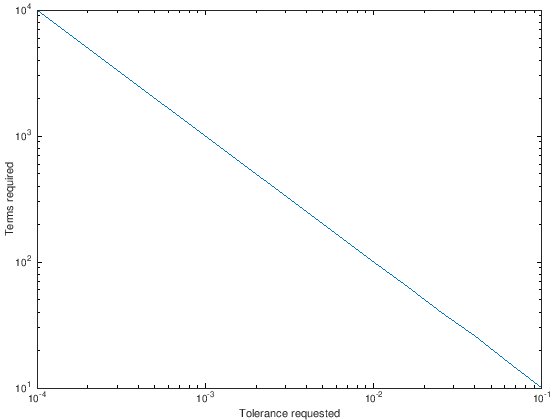

In [11]:
tol_values = logspace(-1,-4,16); %tolerances between 1e-1 and 1e-4
terms_needed = zeros(1,16); %preallocate memory for storing the number of iterations

for i=1:16
    pi_approx = 0;
    k = 1;
    err = abs(pi - pi_approx);
    tol = tol_values(i); %this time, we use the i-th value in tol_store for the tolerance

    while err>tol
        pi_approx = pi_approx + 4 * (-1)^(k+1)/(2*k-1); %add on the next term in the series
        err = abs(pi - pi_approx); %update the error with our new pi_approx value
        k = k+1; %move onto the next term in the sequence in preparation for next time
    end %while, err>tol
   
    terms_needed(i) = k-1; %store the number of terms needed in the i-th position in the array terms_needed
    
end %for, i

f = figure(1);
loglog(tol_values, terms_needed);
xlabel('Tolerance requested');
ylabel('Terms required');

You should find that the number of terms needed scales with the inverse of the tolerance you request the computation go to.

:Solution+

## Key Points:

- `for`-loops perform the same set of tasks a fixed number of times, each time changing a loop variable.
- `while`-loops perform a set of commands until a given condition is reached.
- `for`-loops are useful when you know how many times a task needs to be performed.
- `while`-loops are useful when you want to guarantee that a certain condition is met, before stopping the code.